### <span style="color: rgb(96, 157, 179);">**Predicting Purchase Likelihood for Better Conversion Rates at MarketGenix**</span>

##### **<span style= "color: rgb(171, 211, 226);"> Objective </span>**  
At MarketGenix, the business goal for 2025 is to increase conversions by targeting leads with high purchase potential.  
As a data scientist, I was onboarded to contribute to this mission by building a predictive model that analyzes Google Analytics data and forecasts purchase likelihood.


##### **<span style= "color: rgb(171, 211, 226);"> Key Features </span>**  
The model utilizes the following dimensions:  
    **Engagement Metrics**: `Engagement_Level`, `Likes`, `Shares`, `Comments`, `Clicks`, `Time_Spent_on_Platform`. **Behavioral Insights**: `Engagement_with_Ads`, `Purchase_History`. **Outcome**: `Purchase_Likelihood`.


---


### **<span style= "color: rgb(77, 149, 175);"> Analyses </span>**  

<img src="Images\pexels-photo-590020.webp" alt="Image description" width="width_in_pixels" height="height_in_pixels" />


##### **<span style= "color: rgb(171, 211, 226);"> Workflow Overview </span>**  

1. **<span style= "color: rgb(132, 158, 167);"> Preprocessing </span>**:  
   - Drop irrelevant fields, handle missing values, encode categorical data, and assess feature correlations.  

2. **<span style= "color: rgb(132, 158, 167);"> Scaling </span>**:  
   - Standardize features to ensure uniform treatment of variables with different scales.  

3. **<span style= "color:rgb(132, 158, 167);"> Model Selection </span>**:
   - Choose based on data:  
     - Logistic Regression
     - RidgeClassifierCV (L2):  To perform ___feature shrinkage___.<span style= "color:rgb(115, 122, 141);"> 
  
4. **<span style = "color:rgb(132, 158, 167);"> Evaluation </span>**:  
   - Assess performance using Recall to identify the model and parameers wih the most recall score.  

6. **<span style = "color:rgb(132, 158, 167);"> Conclusion </span>**:  
   - Draw actionable insights aligned with business goals.  

----

In [517]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **<span style= "color: rgb(171, 211, 226);"> Data Reading and Preprocessing </span>**  


In [518]:
df = pd.read_csv(r'./marketing_data new.csv')
df.head()

,User_ID,Engagement_Level,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Purchase_Likelihood,brand,buy
0,2,High,"8,413,654,618,473,890","4,824,120,603,015,070","0,53","0,74","4,666,666,666,666,660","697,986,577,181,208",0,1,0,"5,733,867,342,978,630"
1,4,High,"6,987,951,807,228,910","2,914,572,864,321,600","0,27","0,76","0,5","8,859,060,402,684,560",0,1,0,0
2,8,High,"6,084,337,349,397,580","42,713,567,839,195,900","0,84","0,92","6,333,333,333,333,330","6,778,523,489,932,880",1,0,"7,045,884,279,284,790","7,096,161,971,300,210"
3,13,High,"6,305,220,883,534,130","7,537,688,442,211,050","7,000,000,000,000,000","0,18","16,666,666,666,666,600","1,342,281,879,194,630",1,0,0,"5,160,008,998,865,630"
4,14,High,"28,112,449,799,196,700","9,798,994,974,874,370","0,27","0,34","13,333,333,333,333,300","60,402,684,563,758,300",1,1,0,"577,341,669,064,506"


_<span style= "color: rgb(102, 186, 192);"> The `user_ID` column is removed because it does not contribute meaningful information to the model. It serves merely as a placeholder and does not impact the predictive power of the model. The other fields- _technically_- may have some impact on the likelihood to purchase</span>_.

In [519]:
df.drop(['User_ID'], axis=1, inplace=True)



_<span style= "color: rgb(102, 186, 192);"> I need to encode the `Engagement_Level` field, but first, I will convert all the data types to their appropriate formats</span>_.

In [520]:
df.dtypes
df = df.convert_dtypes()
df.dtypes

# this did not help because only datatypes classified as objcts were hanged to strings. 

Engagement_Level          string
Likes                     string
Shares                    string
Comments                  string
Clicks                    string
Engagement_with_Ads       string
Time_Spent_on_Platform    string
Purchase_History           Int64
Purchase_Likelihood        Int64
brand                     string
buy                       string
dtype: object

In [521]:
df['Purchase_History'].nunique()
df['Purchase_Likelihood'].nunique()

# there'd be no need to work on these columns; they each have 2 unique binary values (1, 0)

2

_<span style= "color: rgb(102, 186, 192);"> To ensure the fields are completely clean and not still identified as strings; abnormal charcaters would be worked on alongside the datatype format</span>_.

In [522]:
column_to_float = ['Likes', 'Shares', 'Comments', 'Clicks',
       'Engagement_with_Ads', 'Time_Spent_on_Platform', 'brand', 'buy']

for column in column_to_float:
    df[column] = df[column].astype(str).str.strip().replace(r'[\n\t\r, !()* $%#@&'']', '', regex = True).astype(float)

    df[column] = pd.to_numeric(df[column])


# I am converting to float because floats datatypes are accommodative of integers but not vice-versa.

In [523]:
df[df[column_to_float] == ''].sum()

#There are no null values or empty strings in the float_converted fields 

Likes                     0.0
Shares                    0.0
Comments                  0.0
Clicks                    0.0
Engagement_with_Ads       0.0
Time_Spent_on_Platform    0.0
Purchase_History          0.0
Purchase_Likelihood       0.0
brand                     0.0
buy                       0.0
dtype: float64

__<span style= "color: rgb(105, 207, 233);">Check for missing values</span>__

In [524]:
df.isnull().sum()

# There are no nulll values

Engagement_Level          0
Likes                     0
Shares                    0
Comments                  0
Clicks                    0
Engagement_with_Ads       0
Time_Spent_on_Platform    0
Purchase_History          0
Purchase_Likelihood       0
brand                     0
buy                       0
dtype: int64

In [525]:
df.dtypes

#  Datatypes across all fields are accurate

Engagement_Level           string
Likes                     float64
Shares                    float64
Comments                  float64
Clicks                    float64
Engagement_with_Ads       float64
Time_Spent_on_Platform    float64
Purchase_History            Int64
Purchase_Likelihood         Int64
brand                     float64
buy                       float64
dtype: object

**<span style= "color: rgb(105, 207, 233);"> Encode the string values in the `Engagement_Level` field</span>**

In [526]:
pd_dummies = pd.get_dummies(df['Engagement_Level'], drop_first=True)
df = pd.concat([df, pd_dummies], axis = 1)
df.drop('Engagement_Level', axis = 1, inplace = True)
df

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Purchase_Likelihood,brand,buy,Low,Medium
0,8.413655e+15,4.824121e+15,5.300000e+01,74.0,4.666667e+15,6.979866e+14,0,1,0.000000e+00,5.733867e+15,0,0
1,6.987952e+15,2.914573e+15,2.700000e+01,76.0,5.000000e+00,8.859060e+15,0,1,0.000000e+00,0.000000e+00,0,0
2,6.084337e+15,4.271357e+16,8.400000e+01,92.0,6.333333e+15,6.778523e+15,1,0,7.045884e+15,7.096162e+15,0,0
3,6.305221e+15,7.537688e+15,7.000000e+15,18.0,1.666667e+16,1.342282e+15,1,0,0.000000e+00,5.160009e+15,0,0
4,2.811245e+16,9.798995e+15,2.700000e+01,34.0,1.333333e+16,6.040268e+16,1,1,0.000000e+00,5.773417e+14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,9.016064e+15,2.914573e+15,2.600000e+01,1.0,7.333333e+15,8.120805e+15,0,1,0.000000e+00,8.341608e+15,0,1
496,4.759036e+15,1.507538e+15,3.100000e+01,2.0,8.000000e+00,4.161074e+15,0,0,0.000000e+00,0.000000e+00,0,1
497,5.040161e+14,9.497487e+14,5.600000e+01,98.0,5.000000e+00,2.684564e+16,0,1,6.914343e+15,0.000000e+00,0,1
498,0.000000e+00,7.587940e+15,8.000000e+00,96.0,9.333333e+15,7.651007e+15,0,0,0.000000e+00,0.000000e+00,0,1


In [527]:
df.dtypes

# Returned datatypes all mirror the datatype in each field

Likes                     float64
Shares                    float64
Comments                  float64
Clicks                    float64
Engagement_with_Ads       float64
Time_Spent_on_Platform    float64
Purchase_History            Int64
Purchase_Likelihood         Int64
brand                     float64
buy                       float64
Low                         uint8
Medium                      uint8
dtype: object

#### **<span style= "color: rgb(171, 211, 226);"> Exploratory Data Analysis </span>**  


_<span style= "color: rgb(102, 186, 192);"> To understand the relationship between the variables and spot if there is any multicolinearity that could cause high variance in the model</span>._

In [528]:
corr_mat = df.corr()
corr_mat

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Purchase_Likelihood,brand,buy,Low,Medium
Likes,1.000000,0.012489,-0.043565,-0.080249,0.032280,-0.064047,0.048032,0.012350,0.069659,0.039120,-0.053425,0.036053
Shares,0.012489,1.000000,-0.054251,0.030450,-0.006023,-0.019129,-0.036231,-0.027609,-0.047083,-0.001329,-0.000775,-0.034036
Comments,-0.043565,-0.054251,1.000000,0.045243,0.024012,0.096088,0.075851,0.006570,-0.039957,0.069356,-0.098464,-0.009389
Clicks,-0.080249,0.030450,0.045243,1.000000,-0.044810,-0.032386,0.037863,0.009994,-0.030072,-0.052657,-0.011963,0.005180
Engagement_with_Ads,0.032280,-0.006023,0.024012,-0.044810,1.000000,0.022453,0.012980,0.074005,0.083682,0.002713,-0.058099,0.005933
Time_Spent_on_Platform,-0.064047,-0.019129,0.096088,-0.032386,0.022453,1.000000,-0.043075,-0.003473,-0.011980,0.004238,-0.027584,0.038507
Purchase_History,0.048032,-0.036231,0.075851,0.037863,0.012980,-0.043075,1.000000,0.012484,-0.030177,-0.011794,-0.014484,0.055922
Purchase_Likelihood,0.012350,-0.027609,0.006570,0.009994,0.074005,-0.003473,0.012484,1.000000,-0.001703,-0.038627,0.040131,-0.036875
brand,0.069659,-0.047083,-0.039957,-0.030072,0.083682,-0.011980,-0.030177,-0.001703,1.000000,0.223111,-0.069648,-0.001009
buy,0.039120,-0.001329,0.069356,-0.052657,0.002713,0.004238,-0.011794,-0.038627,0.223111,1.000000,-0.026054,0.050485


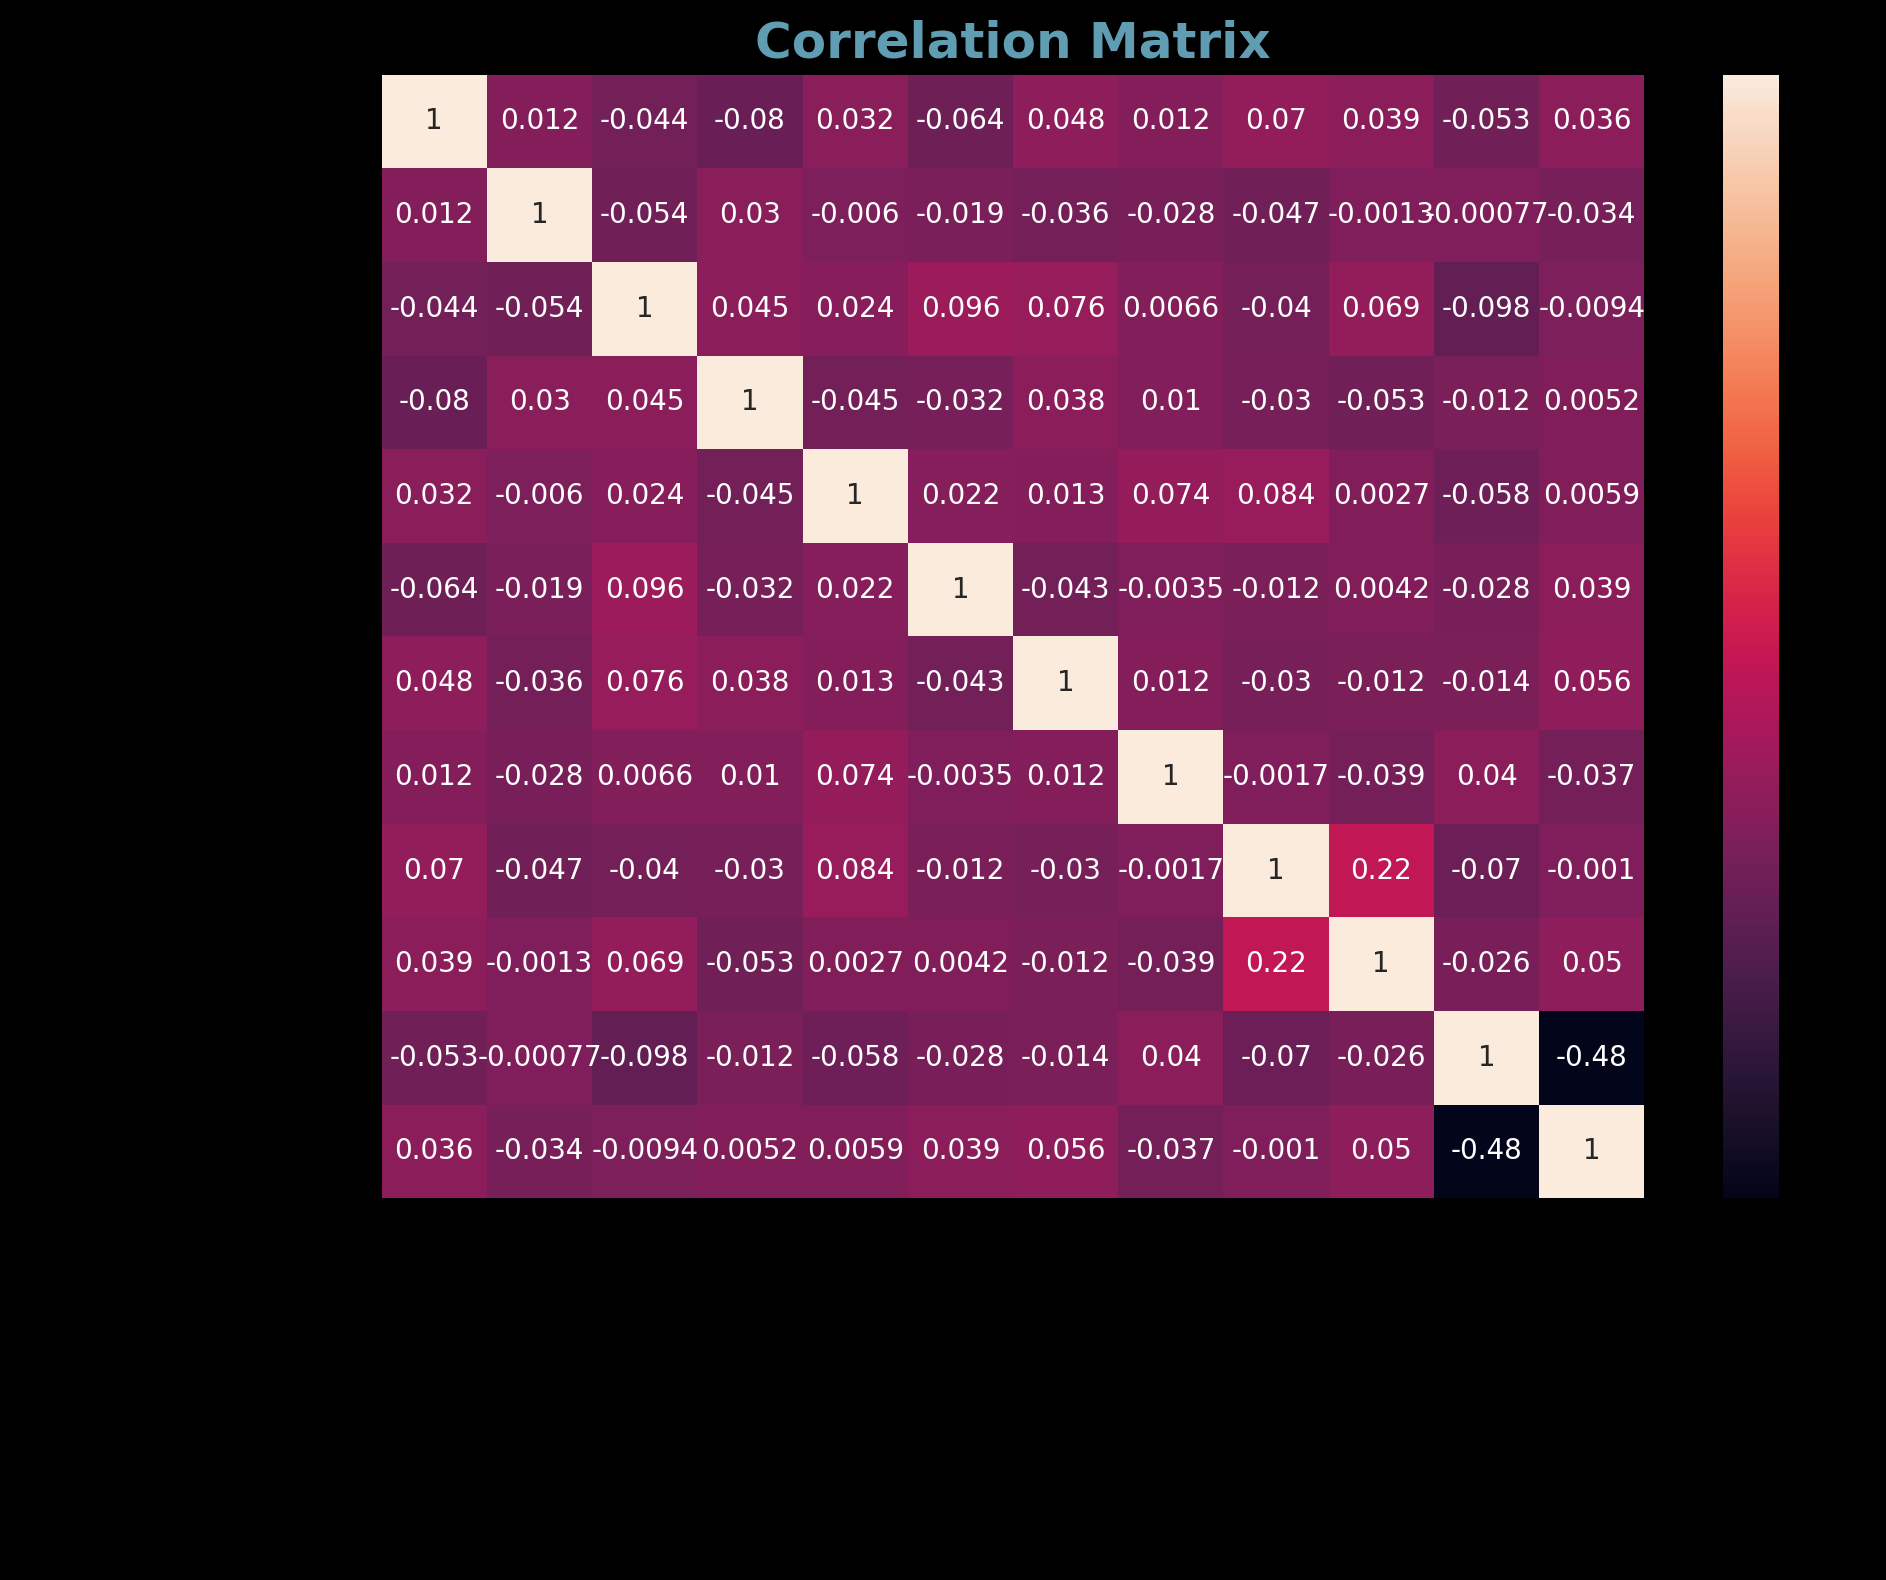

In [529]:
plt.figure(figsize =(10, 8), dpi = 200, clear=True, facecolor='BLACK', edgecolor='Red',frameon=True)

sns.heatmap(corr_mat, annot=True)

plt.title(label='Correlation Matrix', loc='center', fontsize=18, fontweight='bold', color=(96/255, 157/255, 179/255))

plt.tight_layout();

- **Positive Correlations**:  
  From the heatmap, **Engagement_with_Ads** has the highest positive correlation with the target variable, `Purchase_Likelihood`, followed by **Likes**, **Purchase_History**, and **Clicks**. This indicates that these engagement metrics are strong predictors of purchase likelihood.  

- **Negative Correlations**:  
  - **Time_Spent_on_Platform** and **Previous_Buy_Frequency** show an inverse relationship with `Purchase_Likelihood`, meaning the less time spent on the platform or the lower the buy frequency, the higher the likelihood of purchase. This finding may seem counterintuitive, as one might expect higher engagement or frequent purchases to correlate positively.  
  - **Shares** also exhibit a negative correlation with purchase likelihood. This might suggest that users share content when they are not personally interested in buying, while those planning to purchase engage less in sharing.  
  - **Time_Spent_on_Platform** has a minimal inverse correlation with the target, implying it is not a significant predictor.  

- **Multicollinearity Observations**:  
  - **Brand** and **Engagement_with_Ads** have a strong positive correlation, suggesting that people engage with ads based on their affinity for specific brands.  
  - **Time_Spent_on_Platform** is highly correlated with **Comments**, indicating that users tend to stay longer on the platform to interact through comments. To increase time spent, strategies such as promoting engaging content, fostering discussions, or encouraging user comments (e.g., via giveaways or interactive posts) could be effective.  
  - **Purchase_History** shows a strong correlation with **Likes** and **Comments**, indicating that users tend to validate a product's authenticity by engaging with these features. Alternatively, users who haven't engaged may rely on likes and comments to make purchasing decisions.  
  - Additional correlations include **Clicks** and **Comments**, as well as **Brand** and **Likes**, emphasizing the interconnected nature of user behaviors and brand engagement.  

**<span style= "color: rgb(105, 207, 233);"> Check if the data is unbalanced</span>**

In [530]:
df['Purchase_Likelihood'].value_counts()

1    251
0    249
Name: Purchase_Likelihood, dtype: Int64

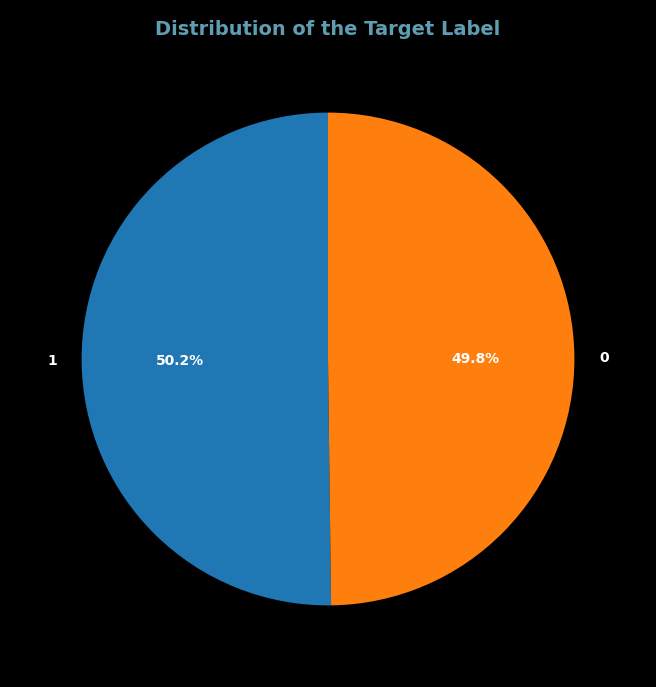

In [531]:
plt.figure(figsize =(7, 4), dpi = 200, clear=True, facecolor='black', edgecolor='Red',frameon=True)

counts = df['Purchase_Likelihood'].value_counts()
plt.pie(
    counts, 
    labels=counts.index,         
    autopct='%1.1f%%',         
    startangle=90,             
    textprops={'fontsize': 5, 'weight': 'bold', 'color': 'white'}
)


plt.title('Distribution of the Target Label', fontsize=7, fontweight='bold', color=(96/255, 157/255, 179/255));
plt.show()


_<span style= "color: rgb(102, 186, 192);"> The distribution of the 1s and 0s in `Purchase_Likelihood` is fairly balanced. There might not be the need for the stratify argument in the train test split</span>_.

**<span style= "color: rgb(105, 207, 233);"> Assess the relationship between the variables in the data</span>**

In [532]:
df.columns

Index(['Likes', 'Shares', 'Comments', 'Clicks', 'Engagement_with_Ads',
       'Time_Spent_on_Platform', 'Purchase_History', 'Purchase_Likelihood',
       'brand', 'buy', 'Low', 'Medium'],
      dtype='object')

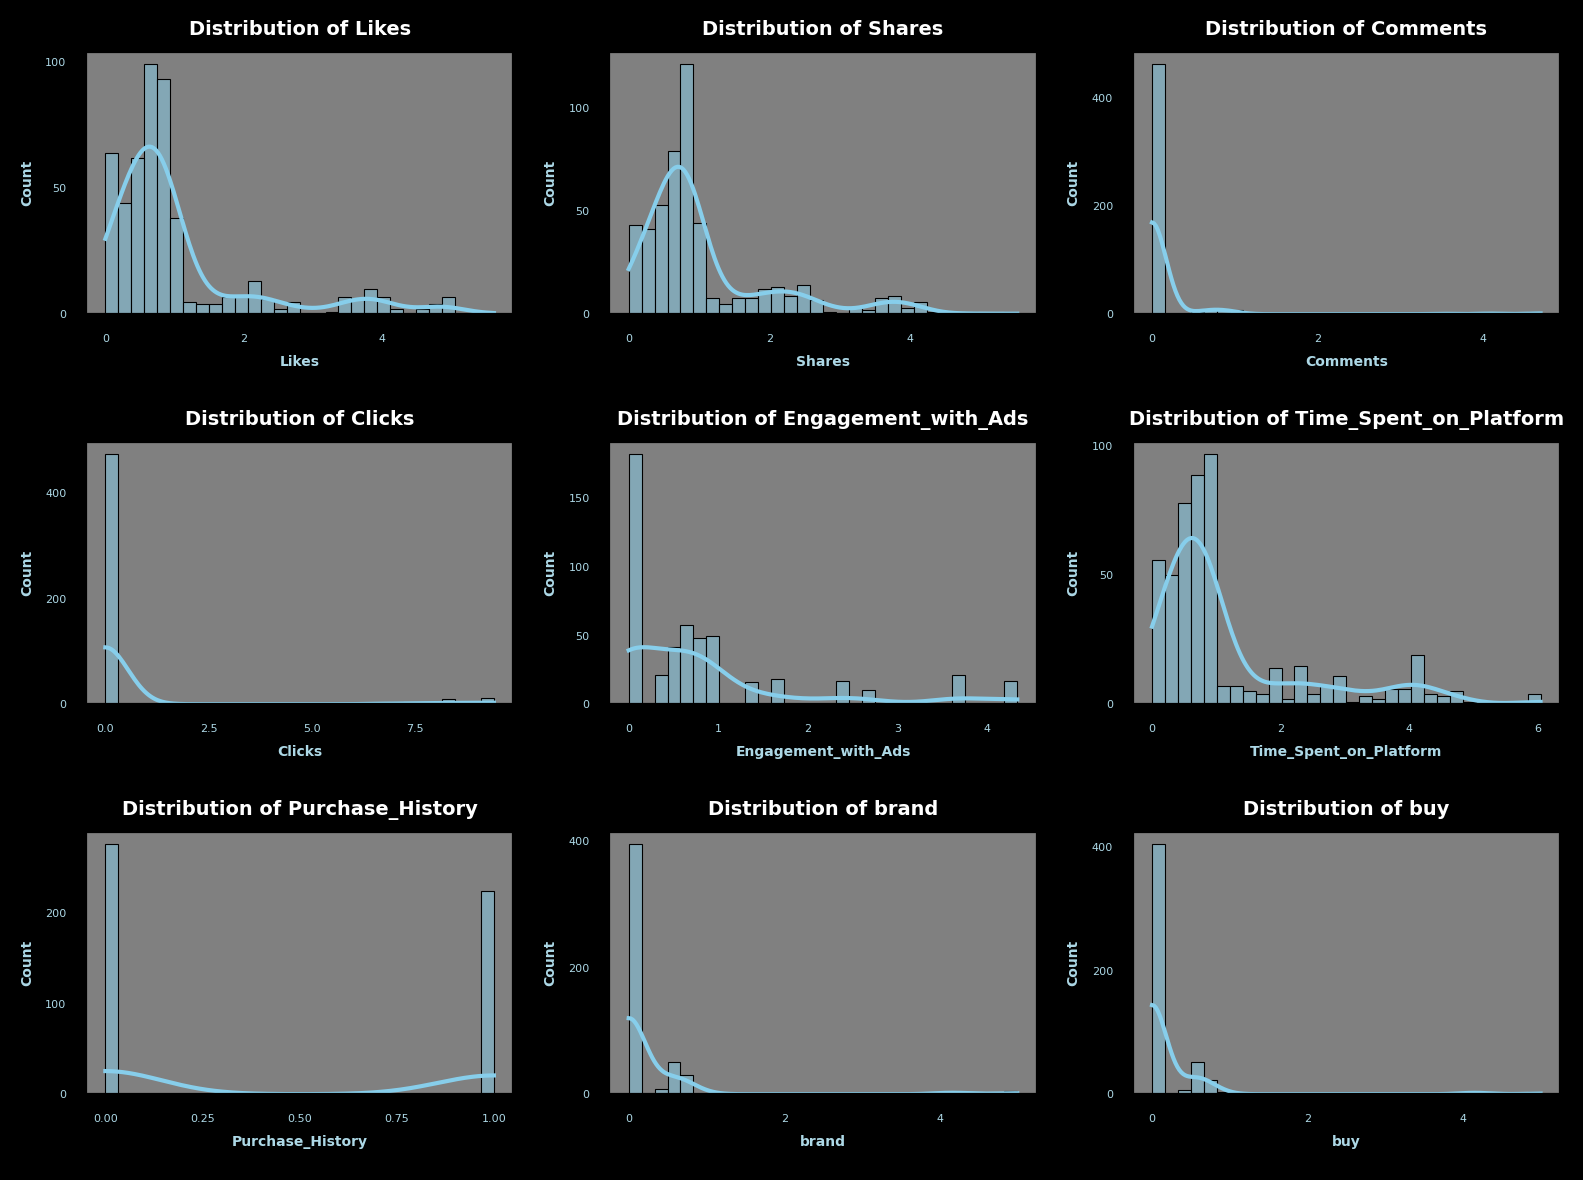

In [533]:

features = ['Likes', 'Shares', 'Comments', 'Clicks', 'Engagement_with_Ads',
            'Time_Spent_on_Platform', 'Purchase_History', 'brand', 'buy']

plt.figure(figsize=(8,6), dpi=200, clear=True, facecolor='black', frameon=True)

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30) 
    
    plt.title(f'Distribution of {feature}', fontsize=7, fontweight='bold', color='white')
    plt.xlabel(feature, fontweight='bold', color='lightblue', fontsize=5)
    plt.ylabel('Count', fontweight='bold', color='lightblue', fontsize=5)
    plt.xticks(color='lightblue', fontsize=4)
    plt.yticks(color='lightblue', fontsize=4)
    
    plt.gca().set_facecolor('grey')

plt.tight_layout()
plt.show()


**<span style= "color: rgb(105, 207, 233);"> Plot Review:</span>**

- _<span style= "color: rgb(102, 186, 192);"> From the above, the fields are all positively skewed with their mode > median > mean. Although, the variance of skeweness varied- where `distribution of engagement_with_Ads` is not as skewed compared to `Distribution of likes` or `Distribution of Time_Spent_on_Platform` split</span>_.                                                                             

#### **<span style= "color: rgb(171, 211, 226);"> Model Development </span>**  


**<span style= "color: rgb(105, 207, 233);">  Scale the input features</span>**

In [534]:
df

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Purchase_Likelihood,brand,buy,Low,Medium
0,8.413655e+15,4.824121e+15,5.300000e+01,74.0,4.666667e+15,6.979866e+14,0,1,0.000000e+00,5.733867e+15,0,0
1,6.987952e+15,2.914573e+15,2.700000e+01,76.0,5.000000e+00,8.859060e+15,0,1,0.000000e+00,0.000000e+00,0,0
2,6.084337e+15,4.271357e+16,8.400000e+01,92.0,6.333333e+15,6.778523e+15,1,0,7.045884e+15,7.096162e+15,0,0
3,6.305221e+15,7.537688e+15,7.000000e+15,18.0,1.666667e+16,1.342282e+15,1,0,0.000000e+00,5.160009e+15,0,0
4,2.811245e+16,9.798995e+15,2.700000e+01,34.0,1.333333e+16,6.040268e+16,1,1,0.000000e+00,5.773417e+14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,9.016064e+15,2.914573e+15,2.600000e+01,1.0,7.333333e+15,8.120805e+15,0,1,0.000000e+00,8.341608e+15,0,1
496,4.759036e+15,1.507538e+15,3.100000e+01,2.0,8.000000e+00,4.161074e+15,0,0,0.000000e+00,0.000000e+00,0,1
497,5.040161e+14,9.497487e+14,5.600000e+01,98.0,5.000000e+00,2.684564e+16,0,1,6.914343e+15,0.000000e+00,0,1
498,0.000000e+00,7.587940e+15,8.000000e+00,96.0,9.333333e+15,7.651007e+15,0,0,0.000000e+00,0.000000e+00,0,1


_<span style= "color: rgb(102, 186, 192);"> Due to the large numbers in some fields- they'd be logarithmly scaled</span>_.


In [535]:
features_to_log = ['Likes', 'Shares', 'Comments', 'Engagement_with_Ads', 'Time_Spent_on_Platform', 'brand', 'buy']

for feature in features_to_log:
    df[f'{feature}_log'] = np.log(df[feature] + 1)
    df = df.drop(feature, axis=1)


In [536]:
df

,Clicks,Purchase_History,Purchase_Likelihood,Low,Medium,Likes_log,Shares_log,Comments_log,Engagement_with_Ads_log,Time_Spent_on_Platform_log,brand_log,buy_log
0,74.0,0,1,0,0,36.668632,36.112405,3.988984,36.079221,34.179221,0.000000,36.285167
1,76.0,0,1,0,0,36.482964,35.608500,3.332205,1.791759,36.720217,0.000000,0.000000
2,92.0,1,0,0,0,36.344494,38.293293,4.442651,36.384603,36.452536,36.491220,36.498330
3,18.0,1,0,0,0,36.380154,36.558692,36.484687,37.352187,34.833147,0.000000,36.179715
4,34.0,1,1,0,0,37.874989,36.821056,3.332205,37.129044,38.639810,0.000000,33.989455
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,0,1,0,1,36.737784,35.608500,3.295837,36.531207,36.633206,0.000000,36.660032
496,2.0,0,0,0,1,36.098822,34.949254,3.465736,2.197225,35.964550,0.000000,0.000000
497,98.0,0,1,0,1,33.853629,34.487219,4.043051,1.791759,37.828880,36.472374,0.000000
498,96.0,0,0,0,1,0.000000,36.565336,2.197225,36.772369,36.573614,0.000000,0.000000


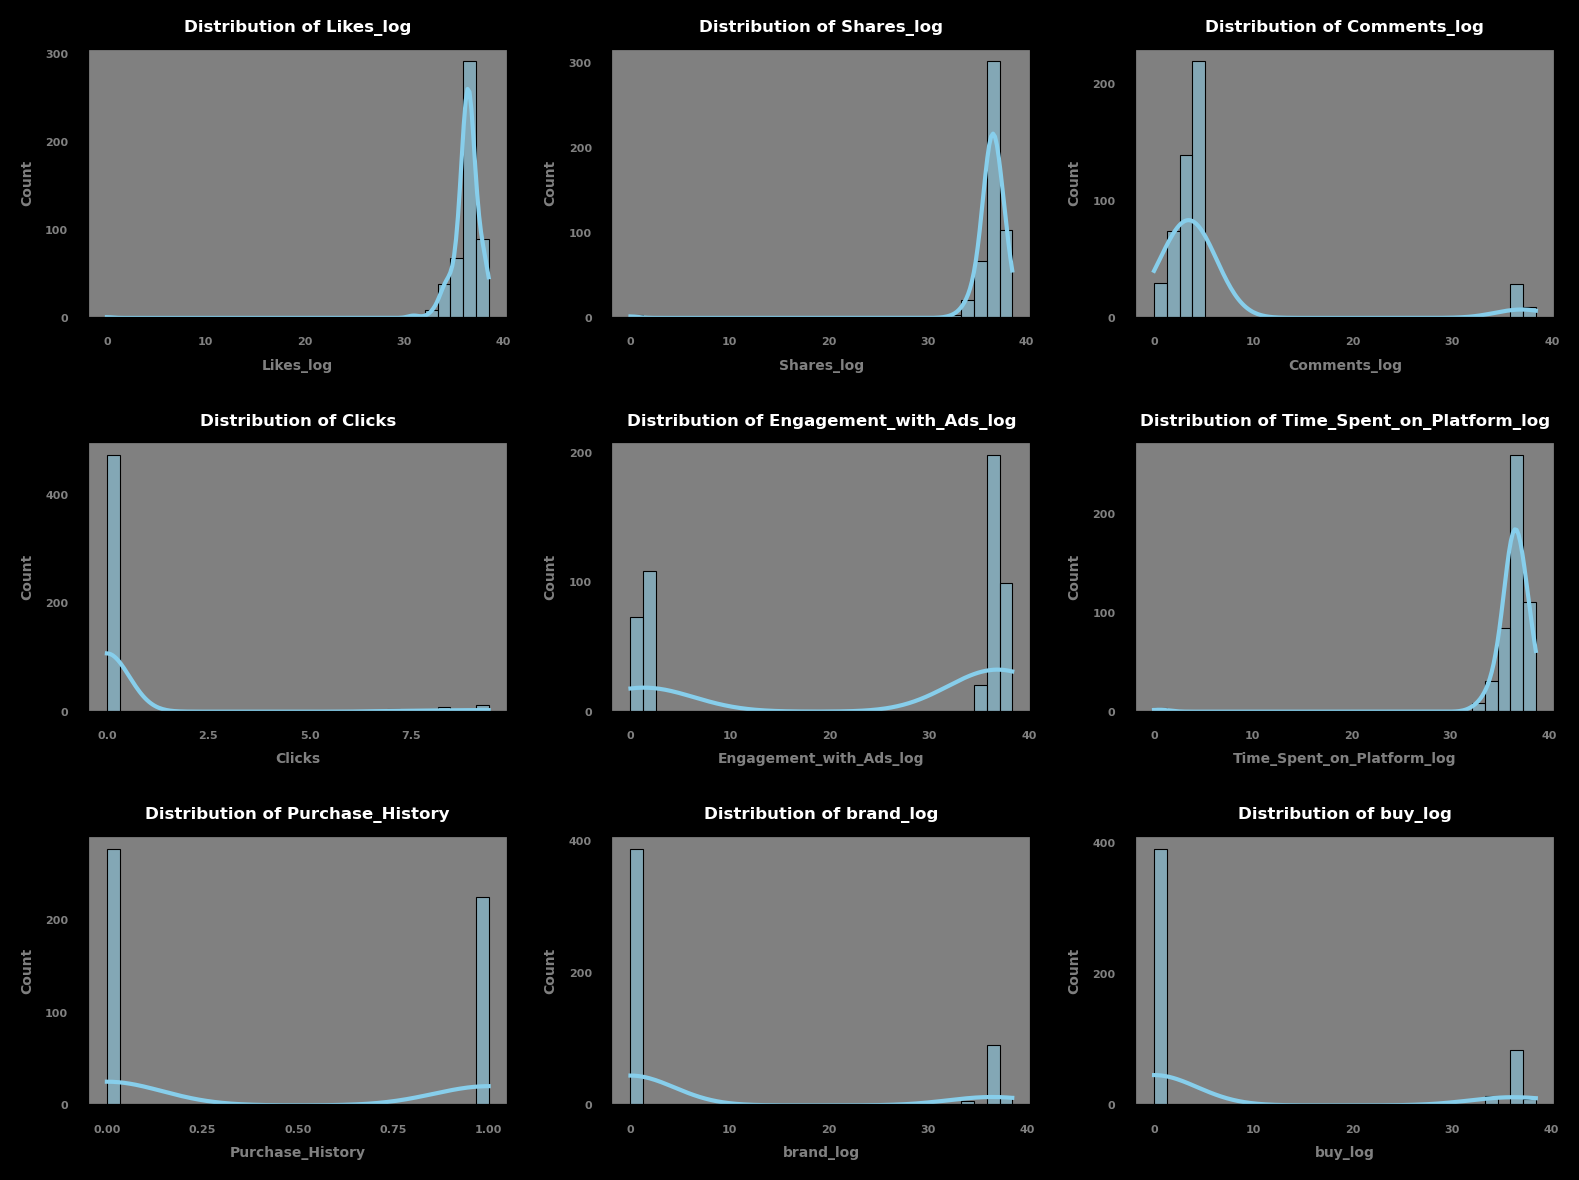

In [537]:

features = ['Likes_log', 'Shares_log', 'Comments_log', 'Clicks', 'Engagement_with_Ads_log',
            'Time_Spent_on_Platform_log', 'Purchase_History', 'brand_log', 'buy_log']

plt.figure(figsize=(8,6), dpi=200, clear=True, facecolor='black', frameon=True)

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30)
    plt.xlabel(feature, fontweight='bold', fontsize=5, color='grey')
    plt.ylabel(f'Count', fontweight='bold', fontsize=5, color='grey')
    plt.xticks(fontweight='bold', fontsize=4, color='grey')    
    plt.yticks(fontweight='bold', fontsize=4, color='grey')   
    plt.title(f'Distribution of {feature}', fontweight='bold', fontsize=6, color='white')

    plt.gca().set_facecolor('grey')

plt.tight_layout()
plt.show()



**<span style= "color: rgb(105, 207, 233);"> Plot Review:</span>**

- _<span style= "color: rgb(102, 186, 192);"> From the above, the efefct of the logarithm scale affected the skewness of some fields- making them negatively skewed as opposed to the original positve skeweness. Fields like `Likes_log`, `Shares_log`, `Clicks_log`, `Engagement-with_Ads`, `Time-spent_on_the_App`, '`brand`, and `buy`</span>_.  

- _<span style= "color: rgb(102, 186, 192);"> Owing to the large skewness presented in the features- the median vaiue would be referenced in determining if scaling is relevant </span>_.        

**<span style= "color: rgb(105, 207, 233);">  Train Test Split</span>**

In [538]:
X = df.drop('Purchase_Likelihood', axis = 1)
y = df['Purchase_Likelihood']

In [539]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=29, shuffle = True)


In [540]:
df[features].describe()

,Likes_log,Shares_log,Comments_log,Clicks,Engagement_with_Ads_log,Time_Spent_on_Platform_log,Purchase_History,brand_log,buy_log
count,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,36.303674,36.332223,5.913618,4.432000e+14,23.915418,36.235568,0.448000,8.163746,7.893924
std,1.997141,2.975920,8.986067,1.905728e+15,17.110055,3.392072,0.497787,15.213086,14.967039
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.019833,36.175396,2.930922,8.000000e+00,1.791759,36.049460,0.000000,0.000000,0.000000
50%,36.511294,36.588246,3.891820,3.600000e+01,36.384603,36.537896,0.000000,0.000000,0.000000
75%,36.811295,36.846374,4.317488,7.200000e+01,36.772369,37.030372,1.000000,0.000000,0.000000
max,38.568136,38.551122,38.388924,9.400000e+15,38.307699,38.639810,1.000000,38.449472,38.450565


- _<span style= "color: rgb(102, 186, 192);"> The median values of fields `Likes_log`, `Shares_log`, `Engagement_with_Ads_log`, `Time_Spent_on_Platform_log` all have the median values hoovering around 36 </span>._
- _<span style= "color: rgb(102, 186, 192);"> While `Comments_log` and `Clicks` have their median values around 3.6-3.8 </span>_.
- _<span style= "color: rgb(102, 186, 192);"> While `Purchase_History`, `brand_log`, `buy_log` all have median values of 0 (the plots above dispay these fields to have binary values- so a median of 0 or 1 is not far-fetched) </span>_.   


To determnine the scaling type (RobustScaler _(best for skewed data ith outliers)_ or MinMax Scaler _(best for skewed data without outliers). StandardScaler would use the mean and std (wgich is a wrong metric due to the data skeweness0- so it wouldn not be considered.)

Calculating IQRs for outliers.

In [541]:
df[features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Likes_log,500.0,3.630367e+01,1.997141e+00,0.0,36.019833,36.511294,36.811295,3.856814e+01
Shares_log,500.0,3.633222e+01,2.975920e+00,0.0,36.175396,36.588246,36.846374,3.855112e+01
Comments_log,500.0,5.913618e+00,8.986067e+00,0.0,2.930922,3.891820,4.317488,3.838892e+01
Clicks,500.0,4.432000e+14,1.905728e+15,0.0,8.000000,36.000000,72.000000,9.400000e+15
Engagement_with_Ads_log,500.0,2.391542e+01,1.711005e+01,0.0,1.791759,36.384603,36.772369,3.830770e+01
Time_Spent_on_Platform_log,500.0,3.623557e+01,3.392072e+00,0.0,36.049460,36.537896,37.030372,3.863981e+01
Purchase_History,500.0,4.480000e-01,4.977867e-01,0.0,0.000000,0.000000,1.000000,1.000000e+00
brand_log,500.0,8.163746e+00,1.521309e+01,0.0,0.000000,0.000000,0.000000,3.844947e+01
buy_log,500.0,7.893924e+00,1.496704e+01,0.0,0.000000,0.000000,0.000000,3.845056e+01


In [542]:
iqr_check = df[features].describe().transpose()

In [543]:
IQR = iqr_check['75%'] - iqr_check['25%']
upper_limit = iqr_check['75%'] + IQR*1.5
lower_limit = iqr_check['25%'] - IQR*1.5

print(f'The upper limit value is :{upper_limit}')
print(f'The lower limit value is :{lower_limit}')

The upper limit value is :Likes_log                      37.998488
Shares_log                     37.852841
Comments_log                    6.397337
Clicks                        168.000000
Engagement_with_Ads_log        89.243282
Time_Spent_on_Platform_log     38.501741
Purchase_History                2.500000
brand_log                       0.000000
buy_log                         0.000000
dtype: float64
The lower limit value is :Likes_log                     34.832640
Shares_log                    35.168929
Comments_log                   0.851073
Clicks                       -88.000000
Engagement_with_Ads_log      -50.679154
Time_Spent_on_Platform_log    34.578091
Purchase_History              -1.500000
brand_log                      0.000000
buy_log                        0.000000
dtype: float64


In [545]:
outliers = {}

for column in features:
    outlier_condition = (df[column] < lower_limit[column]) | (df[column] > upper_limit[column])
    
    outliers[column] = df[outlier_condition].index.tolist()

columns_with_outliers = [column for column, indices in outliers.items() if len(indices) > 0]

print("Columns with outliers:", columns_with_outliers)


Columns with outliers: ['Likes_log', 'Shares_log', 'Comments_log', 'Clicks', 'Time_Spent_on_Platform_log', 'brand_log', 'buy_log']


**<span style= "color: rgb(105, 207, 233);">  Standardize the input features</span>**

In [546]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


**<span style= "color: rgb(105, 207, 233);"> LogisticRegression </span>**


_<span style= "color: rgb(102, 186, 192);"> using Recall as a scoring metric because the marketing agency would rather optimize the chance of converting a lead by chasing False-positives than 
losing a lead because of False-negatives </span>_. 

In [547]:
from sklearn.metrics import recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(scaled_X_train, y_train)
lr_y_pred = lr_model.predict(scaled_X_test)

accuracy = accuracy_score(y_test, lr_y_pred)
recall = recall_score(y_test, lr_y_pred)
f1 = f1_score(y_test, lr_y_pred)

print(f'The Recall score for simple LogisticRegression Model is: {recall}')
print(f'The F1 score simple LogisticRegression Model is: {f1}')
print(f'The Accuracy score simple LogisticRegression Model is: {accuracy}')

The Recall score for simple LogisticRegression Model is: 0.6470588235294118
The F1 score simple LogisticRegression Model is: 0.567741935483871
The Accuracy score simple LogisticRegression Model is: 0.5533333333333333


**<span style= "color: rgb(105, 207, 233);"> LogisticRegression With GridSearchCV </span>**


In [548]:
from sklearn.model_selection import GridSearchCV


model_lr = LogisticRegression()
param_grid = [
    {
        'penalty': ['l2'], 
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True],
        'solver': ['liblinear', 'saga'] ,
        'max_iter': [1000000]

    },
    {
        'penalty': ['l1', 'elasticnet'],  
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True],
        'solver': ['saga'],
        'l1_ratio': np.linspace(0, 1, 10),
        'max_iter': [1000000]

    }
]


grid_search = GridSearchCV(estimator=model_lr, param_grid= param_grid, cv=5, scoring='recall', error_score='raise')


grid_search.fit(scaled_X_train, y_train)
grid_y_pred = grid_search.predict(scaled_X_test)


accuracy = accuracy_score(y_test, grid_y_pred)
recall = recall_score(y_test, grid_y_pred)
f1 = f1_score(y_test, grid_y_pred)

print(f'The Recall score for Grid LogisticRegressionCV Model is: {recall}')
print(f'The F1 score Grid LogisticRegressionCV  Model is: {f1}')
print(f'The Accuracy score Grid LogisticRegressionCV  Model is: {accuracy}')

import warnings
warnings.filterwarnings("ignore")

The Recall score for Grid LogisticRegressionCV Model is: 0.6470588235294118
The F1 score Grid LogisticRegressionCV  Model is: 0.567741935483871
The Accuracy score Grid LogisticRegressionCV  Model is: 0.5533333333333333


In [549]:
grid_search.best_params_

{'C': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.0,
 'max_iter': 1000000,
 'penalty': 'l1',
 'solver': 'saga'}

_<span style= "color: rgb(102, 186, 192);"> Both models have the same metric scores </span>_. 

Model Evaluation

In [550]:
from sklearn.metrics import precision_recall_curve, ConfusionMatrixDisplay, classification_report, confusion_matrix

In [551]:
print(classification_report(y_test, grid_y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.48      0.54        82
         1.0       0.51      0.65      0.57        68

    accuracy                           0.55       150
   macro avg       0.56      0.56      0.55       150
weighted avg       0.57      0.55      0.55       150



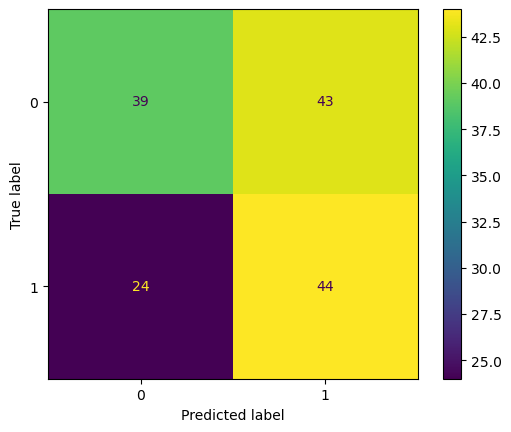

In [552]:
ConfusionMatrixDisplay.from_estimator(grid_search, scaled_X_test, y_test)

# the false posiives (24) is quite high

----

_<span style= "color: rgb(102, 186, 192);"> Using RidgeClassifierCV simply because there are many features with varying weight of impact on the target label. L2 will shrink the feature coefficients proportionally to their impact on the target label, while addressing multicollinearity and reducing high variance.</span>_

**<span style= "color: rgb(105, 207, 233);"> RidgeClassifierCV </span>**

In [563]:
from sklearn.linear_model import RidgeClassifierCV

alphas = [0.1, 0.01, 0.001, 1.0, 10.0, 100.0, 1000]
r_model = RidgeClassifierCV(alphas=alphas, cv = 5,scoring= 'recall')
r_model.fit(scaled_X_train, y_train)
r_y_pred = r_model.predict(scaled_X_test)


accuracy = accuracy_score(y_test, r_y_pred)
recall = recall_score(y_test, r_y_pred)
f1 = f1_score(y_test, r_y_pred)

print(f'The Recall score for RidgeClassifierCV Model is: {recall}')
print(f'The F1 score Grid RidgeClassifierCV  Model is: {f1}')
print(f'The Accuracy score Grid RidgeClassifierCV  Model is: {accuracy}')


The Recall score for RidgeClassifierCV Model is: 0.6617647058823529
The F1 score Grid RidgeClassifierCV  Model is: 0.5232558139534884
The Accuracy score Grid RidgeClassifierCV  Model is: 0.4533333333333333


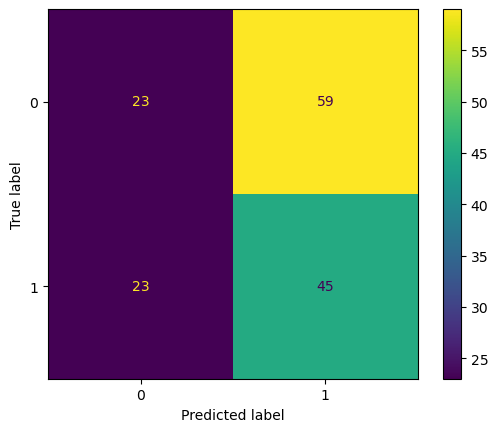

In [554]:
ConfusionMatrixDisplay.from_estimator(r_model, scaled_X_test, y_test)


----
USE PCA

In [555]:
# Carry out PCA since standardizaton has been done. 

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
# Choosing to retain 4 components as the correlation matrix showed 4 main variable dependecies of the target label


scaled_x_train_pca = pca.fit_transform(scaled_X_train)
scaled_x_test_pca = pca.transform(scaled_X_test)


**<span style= "color: rgb(105, 207, 233);"> Data Dimension Check </span>**

In [556]:
scaled_X_train.shape

(350, 11)

In [557]:
scaled_x_test_pca.shape

(150, 4)

In [558]:
scaled_x_test_pca.shape

(150, 4)

**<span style= "color: rgb(105, 207, 233);"> RidgeClassifierCV on scaled PCA variables </span>**

In [564]:
alphas = [0.1, 0.01, 0.001, 1.0, 10.0, 100.0, 1000]

ridge_model = RidgeClassifierCV(alphas=alphas, cv = 5,scoring= 'recall')
ridge_model.fit(scaled_x_train_pca, y_train)
y_pred2 = ridge_model.predict(scaled_x_test_pca)


accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print(f'The Recall score for RidgeClassifierCV Model with PCA dimension-reduction is: {recall}')
print(f'The F1 score Grid RidgeClassifierCV Model with PCA dimension-reduction is: {f1}')
print(f'The Accuracy score Grid RidgeClassifierCV Model with PCA dimension-reduction is: {accuracy}')

The Recall score for RidgeClassifierCV Model with PCA dimension-reduction is: 0.7205882352941176
The F1 score Grid RidgeClassifierCV Model with PCA dimension-reduction is: 0.5568181818181818
The Accuracy score Grid RidgeClassifierCV Model with PCA dimension-reduction is: 0.48


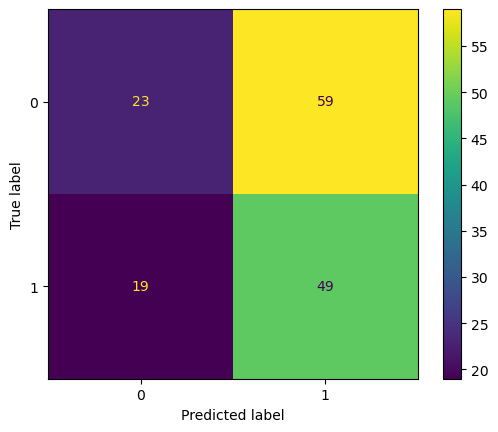

In [560]:
ConfusionMatrixDisplay.from_estimator(ridge_model, scaled_x_test_pca, y_test)


---
#### **<span style= "color: rgb(171, 211, 226);"> Model Deployment </span>**  


In [561]:

ridge_model = RidgeClassifierCV(alphas=alphas, cv = 5,scoring= 'recall')
ridge_model.fit(X, y)

RidgeClassifierCV(alphas=[0.1, 0.01, 0.001, 1.0, 10.0, 100.0, 1000], cv=5,
                  scoring='recall')

In [562]:
from joblib import dump, load
dump(ridge_model, 'marketing_ridge_model.jobib')

# loaded_model = load('marketing_ridge_model')

['marketing_ridge_model.jobib']

-----

#### **<span style= "color: rgb(171, 211, 226);"> Conclusion </span>**  


<img src="Images\pexels-photo-7947846.jpg" alt="Image description" width="width_in_pixels" height="height_in_pixels" />




- **<span style= "color:rgb(132, 158, 167);"> Scaling Type Determination</span>**:

  - <span style= "color:rgb(132, 158, 167);">To address the skewness and outliers in the data</span>:
:
    - RobustScaler is preferred when data contains outliers, as it scales the features based on the interquartile range (IQR), making it robust to extreme values.
    - MinMaxScaler is suitable for skewed data without significant outliers, as it scales values to a fixed range, typically [0, 1], without addressing outliers explicitly.
    - StandardScaler (based on mean and standard deviation) is not considered here, as it is highly sensitive to skewness and outliers in the data, making it unsuitable for this dataset.
 
 
  - <span style= "color:rgb(132, 158, 167);">Outlier Detection via IQR</span>: Calculating the IQR (interquartile range) is an essential step to identify and handle outliers effectively. Features with significant outliers would favor the use of **RobustScaler** for scaling.

  - Given the presence of large skewness in the features, the scaling decision was be based on the median value, as it is more robust to skewed distributions compared to the mean.

- **<span style= "color:rgb(132, 158, 167);"> Scoring Metric</span>**:

  - <span style= "color:rgb(132, 158, 167);">: Recall</span>:
    The recall metric is chosen for evaluation because the marketing agency's priority is to maximize lead conversion.
      - False Positives (Type I Errors): These are acceptable because chasing leads that may not convert is less costly than losing a potential customer.
      - False Negatives (Type II Errors): These should be minimized to ensure the agency does not miss potential buyers.


  - <span style= "color:rgb(132, 158, 167);"> Key Results Summary</span>:

    Of all the models used, RidgeClassifierCV with Principal Component Analysis was the best model for this classification task with scores:

      - Recall: 0.7206
      - F1-Score: 0.5568
      - Accuracy: 0.48  



    It achieved the highest recall (critical for identifying true positives) and maintained a good balance between F1 score and accuracy. Its success can be attributed to the synergy between PCA’s dimensionality reduction and Ridge’s robust regularization.
